##Google Pixel 6A Sentiment Analysis on the basis of Review

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from bs4 import BeautifulSoup
import requests
cust_name=[]
cust_review=[]
for i in range(1,40):
  url="https://www.flipkart.com/redmi-10-midnight-black-64-gb/product-reviews/itmd93641e4ebb47?pid=MOBGC9GYEBH3GZ4E&lid=LSTMOBGC9GYEBH3GZ4ESWAKTT&marketplace=FLIPKART&page="+str(i)
  request=requests.get(url)
  soup=BeautifulSoup(request.content,'html.parser')
  name=soup.find_all('p',attrs={'class':'_2sc7ZR _2V5EHH'})
  review = soup.find_all("div",attrs={"class":"t-ZTKy"})
  for i in range(0,len(name)):
    cust_name.append(name[i].get_text())
  for i in range(0,len(review)):
    cust_review.append(review[i].get_text())
  


#Importing the Regular Expression For cleaning the information and nlp libraries

In [3]:
import re

Importing the natural Language Processing libraries make it more clean

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Stemming the data for extracting the root word
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()

Storing the cleaned data

In [6]:
# Getting the cleaned data
customer_review =[]
for i in range(0, len(cust_review)):
  review = re.sub('[^a-zA-Z]',' ',cust_review[i])  # Extracting the alphabets with the help of regular expression
  review = review.lower()
  review = review.split()
  # After that we have applied the list comprehension
  review = [ps.stem(i) for i in review if not i in stopwords.words('english')] # Removing the stopwords such as Stop words are a set of commonly used words in a language like grammatical words.
  review = ' '.join(review)
  customer_review.append(review)


In [7]:
customer_name =[]
for i in range(0, len(cust_name)):
  review = re.sub('[^a-zA-Z]',' ',cust_name[i])  # Extracting the alphabets with the help of regular expression
  review = review.lower()
  review = review.split()
  # After that we have applied the list comprehension
  review = [ps.stem(i) for i in review if not i in stopwords.words('english')] # Removing the stopwords such as Stop words are a set of commonly used words in a language like grammatical words.
  review = ' '.join(review)
  customer_name.append(review)

In [8]:
customer_name

['rupam dhara',
 'soumadip mondal',
 'kuldeep singh',
 'rahul dhochak',
 'nilesh gaidhani',
 'flipkart custom',
 'nitish gaurav',
 'deepak kumar shrivastava',
 'amal varghes',
 'sharda verma',
 'jegadeesan ramalingam',
 'manish kaushik',
 'silambarasan',
 'flipkart custom',
 'flipkart custom',
 'flipkart custom',
 'ujjwal singh',
 'flipkart custom',
 'flipkart custom',
 'mohd ashraf mohd ashraf zargar',
 'flipkart custom',
 'hasan',
 'sagar pawar',
 'gourab saha',
 'shivam kumar',
 'satyam kumar',
 'ankit rastogi',
 'razim mohmedan',
 'flipkart custom',
 'mohan naik',
 'akshay tyagi',
 'shankar gs',
 'chandu nishad',
 'flipkart custom',
 'polo babu',
 'flipkart custom',
 'niraj kumar',
 'ajaysinh solanki',
 'sahzad saif',
 'flipkart custom',
 'chaithra k g',
 'manali chakrabarti',
 'ravi kumar',
 'chitra dubey',
 'flipkart custom',
 'kripasindhu da',
 'deepti sharma',
 'flipkart custom',
 'mamta pandit',
 'eswaran r',
 'anil payghan',
 'saptarsi masanta',
 'flipkart custom',
 'smaranik

In [9]:
len(customer_review)

247

In [10]:
len(customer_name)

247

# Making the dataframe

In [11]:
import pandas as pd
import numpy as np

In [12]:
data={'name':customer_name,'review':customer_review}

In [13]:
data=pd.DataFrame(data)

In [14]:
data.head()

,name,review
0,rupam dhara,good phone price rang batteri backup good came...
1,soumadip mondal,nice mobil perform good camera qualiti good go...
2,kuldeep singh,good phone nice work good perform nice lookread
3,rahul dhochak,mobil best price rangeprocessor qualcomm snapd...
4,nilesh gaidhani,phone camera good use first phone buyerbatteri...


# To analyze the sentiment for the statement we are importing the Bert Library

In [15]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [17]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [18]:
def sentiment_score(rev):
    tokens = tokenizer.encode(rev, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [19]:
data['sentiment'] = data['review'].apply(lambda x: sentiment_score(x[:len(x)]))

In [20]:
data.head()

,name,review,sentiment
0,rupam dhara,good phone price rang batteri backup good came...,4
1,soumadip mondal,nice mobil perform good camera qualiti good go...,4
2,kuldeep singh,good phone nice work good perform nice lookread,4
3,rahul dhochak,mobil best price rangeprocessor qualcomm snapd...,5
4,nilesh gaidhani,phone camera good use first phone buyerbatteri...,5


In [21]:
print(data['sentiment'].max())
print(data['sentiment'].min())

5
1


In [22]:
# n="I like this movie"
# sentiment_score(n)

In [23]:
for i in range(0,247):
  if data['sentiment'][i]==2:
    data['sentiment'][i]='negative'
  elif data['sentiment'][i]==3:
    data['sentiment'][i]='neutral'
  else:
    data['sentiment'][i]='Good'


In [24]:
data.head()

,name,review,sentiment
0,rupam dhara,good phone price rang batteri backup good came...,Good
1,soumadip mondal,nice mobil perform good camera qualiti good go...,Good
2,kuldeep singh,good phone nice work good perform nice lookread,Good
3,rahul dhochak,mobil best price rangeprocessor qualcomm snapd...,Good
4,nilesh gaidhani,phone camera good use first phone buyerbatteri...,Good


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data['sentiment'].value_counts()

Good        213
neutral      23
negative     11
Name: sentiment, dtype: int64

<Axes: >

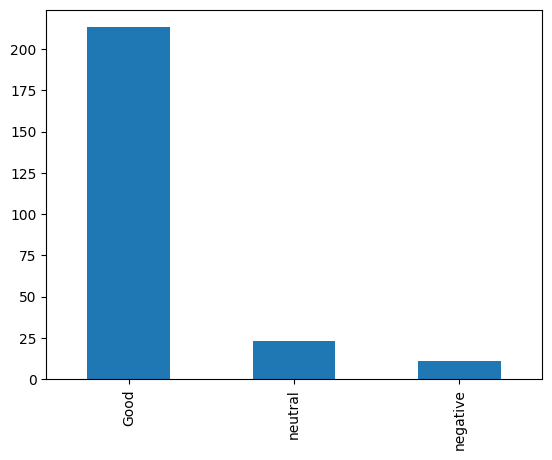

In [27]:
# Importing the Graph as No. of different sentiments as per the polarity for this particular phone
data['sentiment'].value_counts().plot(kind='bar')

# To analyze the sentiment for the statement we are importing the textblob library

In [28]:
data1={'name':customer_name,'review':customer_review}

In [29]:
data1=pd.DataFrame(data1)

In [30]:
from textblob import TextBlob

In [31]:
polarity=[] # It is the backbone of the sentiment analysis,which lie between [-1,1]
subjectivity=[] # It is the personal opinion of the matter which generally lie between [0,1]
for i in data1['review']:
  i=TextBlob(i)
  polarity.append(i.sentiment.polarity)
  subjectivity.append(i.sentiment.subjectivity)

In [32]:
data1['polarity']=polarity

In [33]:
data1['subjectivity']=subjectivity

In [34]:
data1.head()

,name,review,polarity,subjectivity
0,rupam dhara,good phone price rang batteri backup good came...,0.542857,0.571429
1,soumadip mondal,nice mobil perform good camera qualiti good go...,0.640000,0.680000
2,kuldeep singh,good phone nice work good perform nice lookread,0.650000,0.800000
3,rahul dhochak,mobil best price rangeprocessor qualcomm snapd...,1.000000,0.300000
4,nilesh gaidhani,phone camera good use first phone buyerbatteri...,0.238413,0.502857


In [35]:
# To convert the polarity into sentimental categories i.e. positive,negative,neutral
for i in range(0,len(data1['polarity'])):
  if data1['polarity'][i]<-0.2:
    data1['polarity'][i]='negative'
  elif data1['polarity'][i]<=0.2 and data1['polarity'][i]>=-0.2 :
    data1['polarity'][i]='neutral'
  else:
    data1['polarity'][i]='positive'

In [36]:
for i in range(0,len(data1['subjectivity'])):
  if data1['subjectivity'][i]<0.5:
    data1['subjectivity'][i]='Average'
  else:
    data1['subjectivity'][i]='good' 
    

In [37]:
data1.head()

,name,review,polarity,subjectivity
0,rupam dhara,good phone price rang batteri backup good came...,positive,good
1,soumadip mondal,nice mobil perform good camera qualiti good go...,positive,good
2,kuldeep singh,good phone nice work good perform nice lookread,positive,good
3,rahul dhochak,mobil best price rangeprocessor qualcomm snapd...,positive,Average
4,nilesh gaidhani,phone camera good use first phone buyerbatteri...,positive,good


In [38]:
data1.shape

(247, 4)

In [39]:
data1.tail()

,name,review,polarity,subjectivity
242,kuldeep sharma,camera qualiti poor recommend purchas mobil ca...,negative,good
243,manju kench,month purchas becom slow hangingread,negative,Average
244,moham mohsin,batteri issuread,neutral,Average
245,flipkart custom,nice qualiti read,positive,good
246,flipkart custom,goodread,neutral,Average


# Visualization

<Axes: >

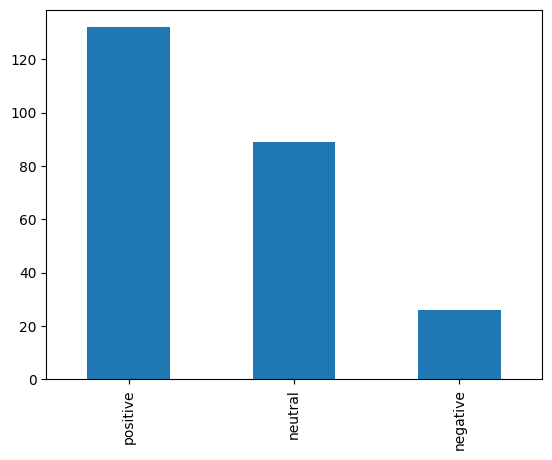

In [40]:
# Importing the Graph as No. of different sentiments as per the polarity for this particular phone
data1['polarity'].value_counts().plot(kind='bar')

<Axes: >

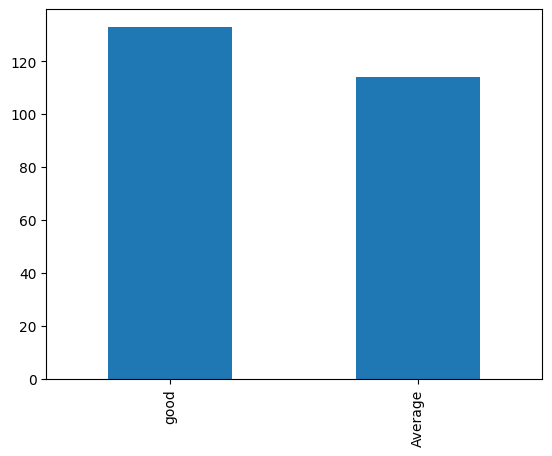

In [41]:
# Importing the Graph as No. of different sentiments as per the subjectivity parametre for this particular phone
data1['subjectivity'].value_counts().plot(kind='bar')